# Automatic Mesh Refinement
Instead of having to divide the cell manually we will try to write a function for it.

We will take the cell below as the original cell.

C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


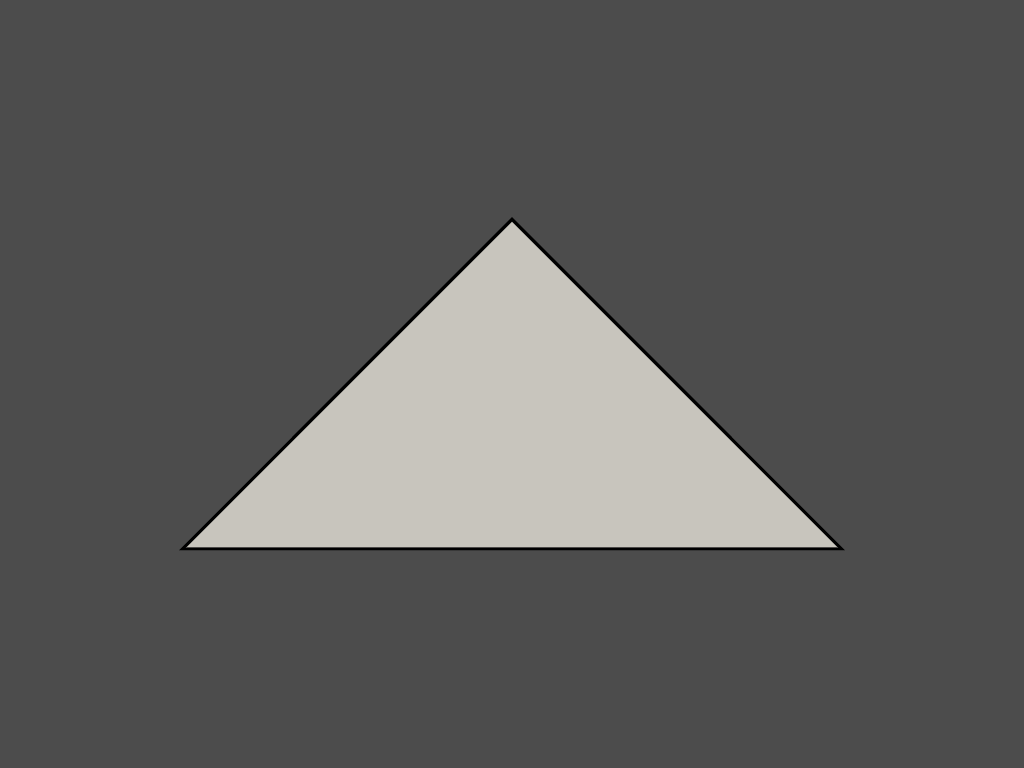

In [1]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])
cells = [[3, 0, 1, 2]]
mesh = pyvista.PolyData(points, [3, 0, 1, 2])
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(3)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

# Option 1
Now lets try to divide this cell into two. Manually it is done the following way:

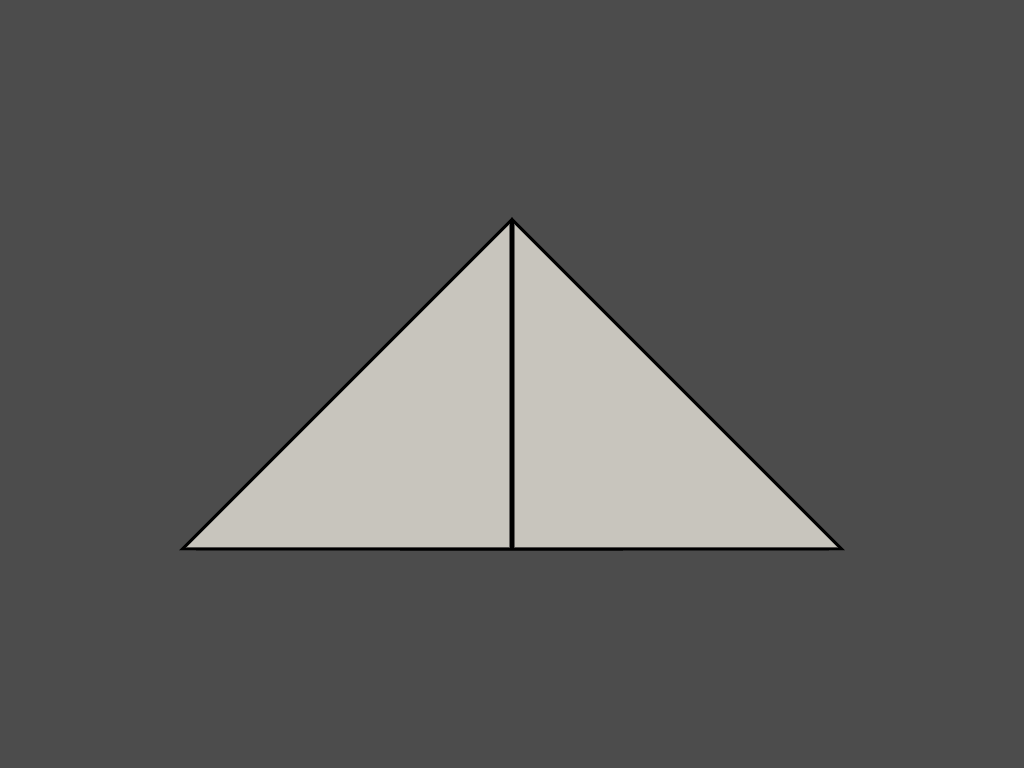

In [2]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0],
                   [1,0,0]])
# [number of points, first point, second point, third point]
cells = [[3,0,3,2], [3, 3,1,2]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(4)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

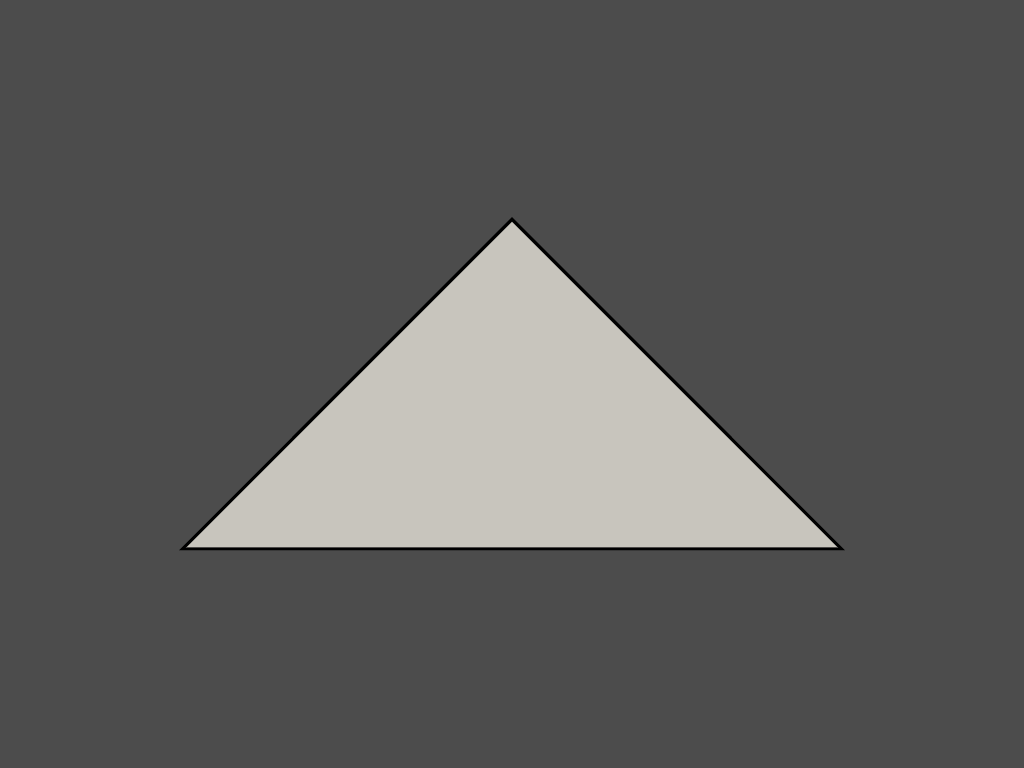

In [3]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])
cells = [[3, 0, 1, 2]]
mesh = pyvista.PolyData(points, [3, 0, 1, 2])
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(3)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

We first try to add a point to the list.

In [4]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])


point = ((points[1]-points[0])/2)
points = np.vstack([points,point])
points

array([[0., 0., 0.],
       [2., 0., 0.],
       [1., 1., 0.],
       [1., 0., 0.]])

Now this has been successful we will try to alter the connectivity.

In [5]:
#cells = [[3, 0, 1, 2]] --> cells = [[3,0,3,2], [3, 3,1,2]]
cells = [[3, 0, 1, 2]]
cells[0]=[3, 0,3,2]
cells = np.vstack([cells, [3, 3,1,2]])
cells

array([[3, 0, 3, 2],
       [3, 3, 1, 2]])

In [6]:
cells = [[3, 0, 1, 2]]
c = 0
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
cells[c] = [3, d,e,f]
cells

[[3, 0, 1, 2]]

In [7]:
g = len(points)
cells[c]= [3, (g-1),e,f]
cells = np.vstack([cells, [3, d,(g-1),f]])
cells

array([[3, 3, 1, 2],
       [3, 0, 3, 2]])

So the full code for this would be:

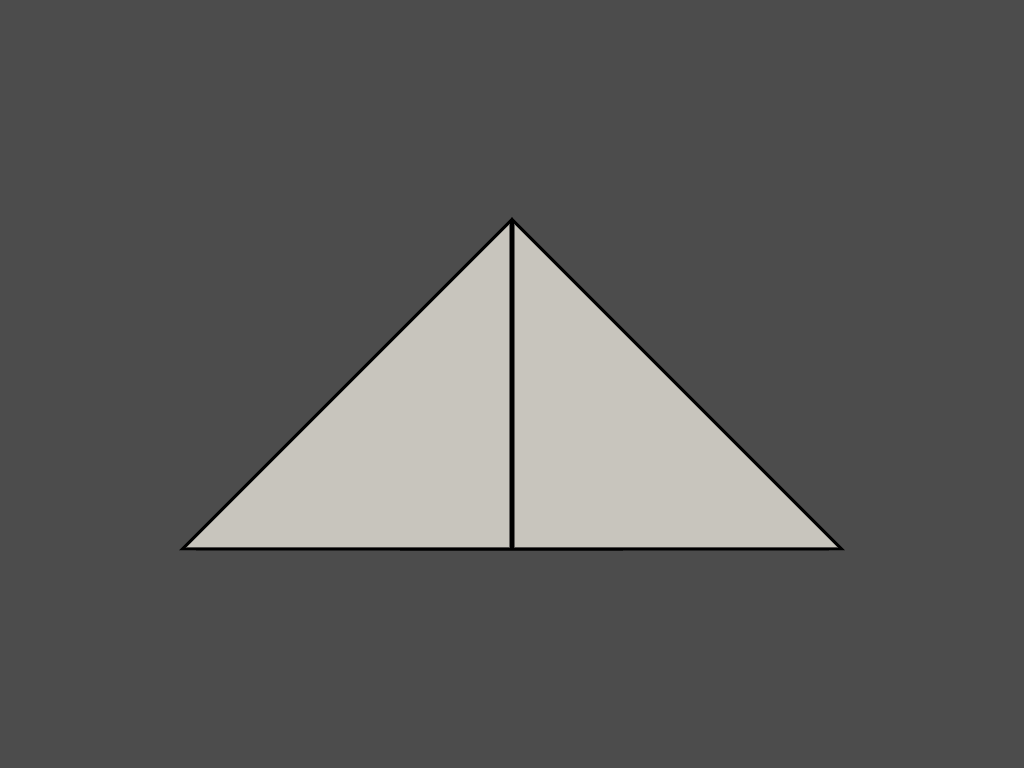

In [8]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])
cells = [[3, 0, 1, 2]]


point = ((points[1]-points[0])/2)
points = np.vstack([points,point])

c = 0
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
g = len(points)
cells[c]= [3, (g-1),e,f]
cells = np.vstack([cells, [3, d,(g-1),f]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(3)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

Lets see if it also works on the small mesh...

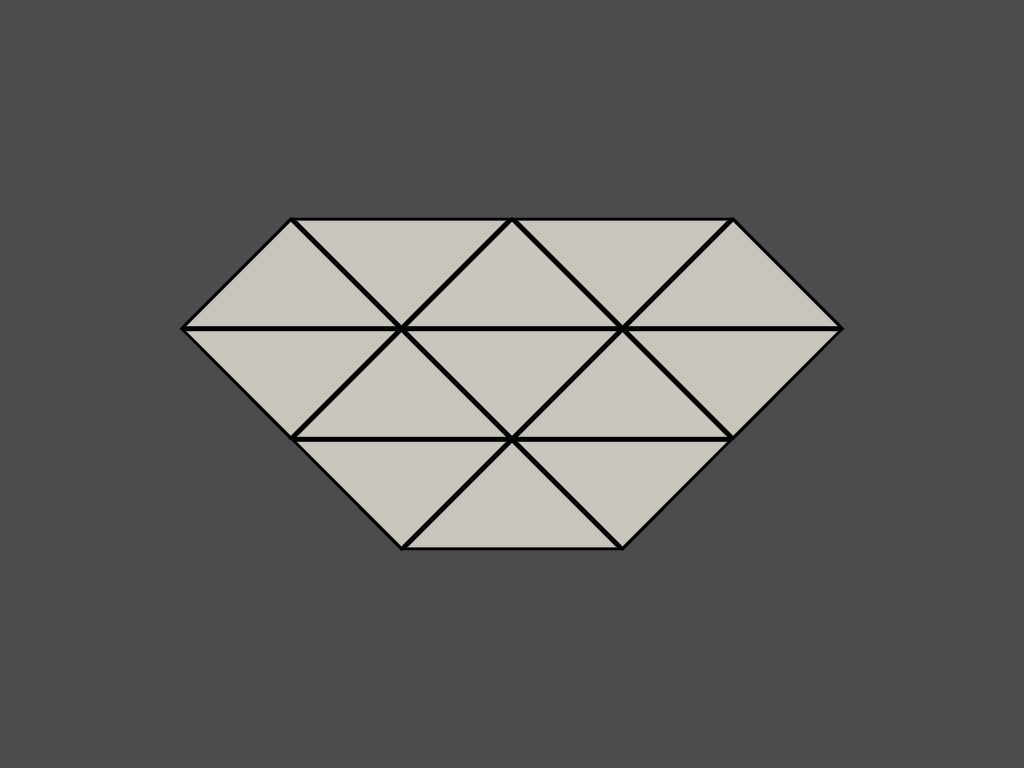

In [9]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(12)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

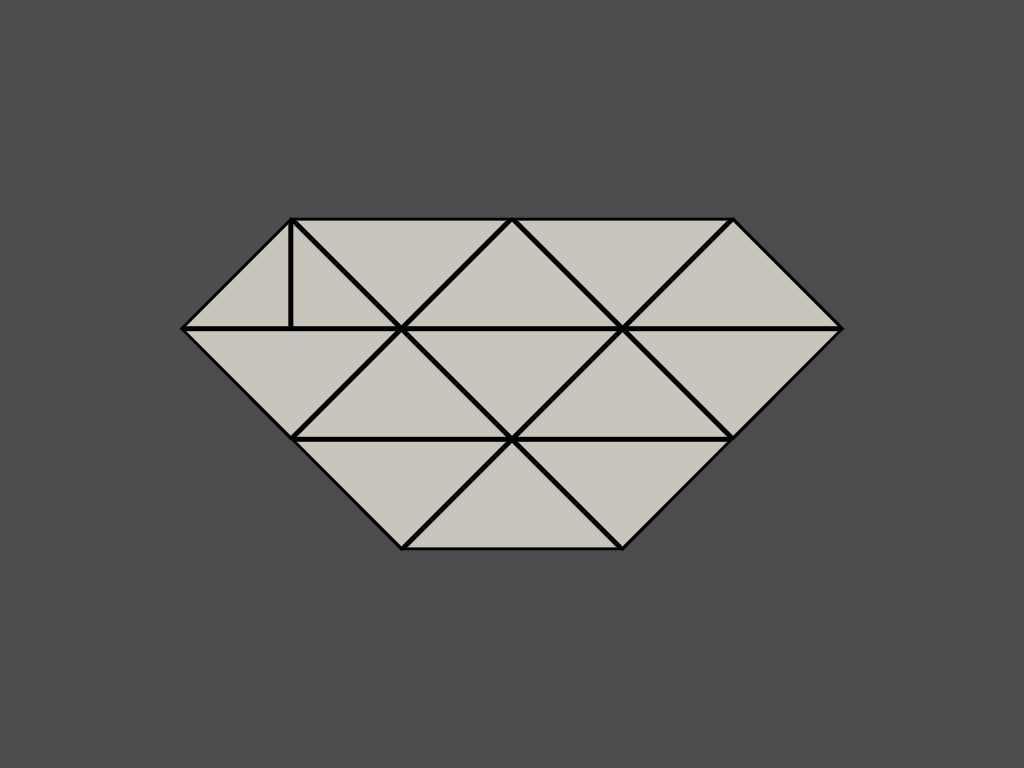

In [10]:
point = ((points[1]+points[0])/2)
points = np.vstack([points,point])

c = 0
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
g = len(points)
cells[c]= [3, (g-1),e,f]
cells = np.vstack([cells, [3, d,(g-1),f]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(3)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()
g = len(points)


Now lets see if we can get a specific cell refined..

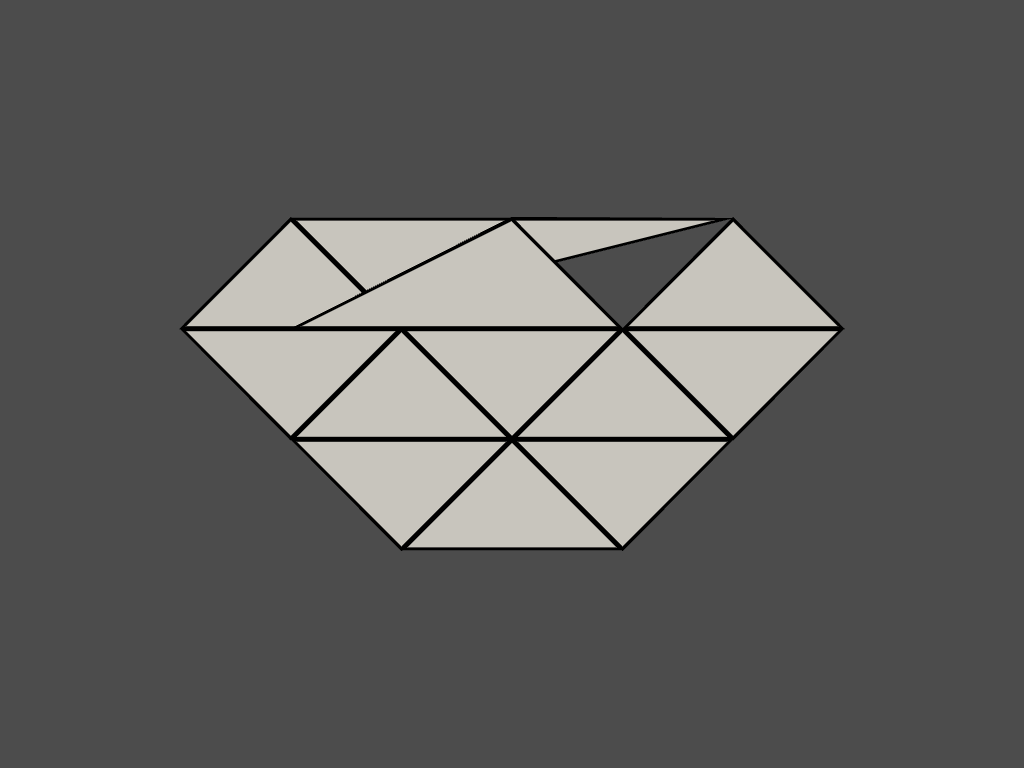

In [11]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

point = ((points[1]+points[0])/2)
points = np.vstack([points,point])

c = 6
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
g = len(points)
cells[c]= [3, (g-1),e,f]
cells = np.vstack([cells, [3, d,(g-1),f]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(3)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

That did not work so lets review the code..

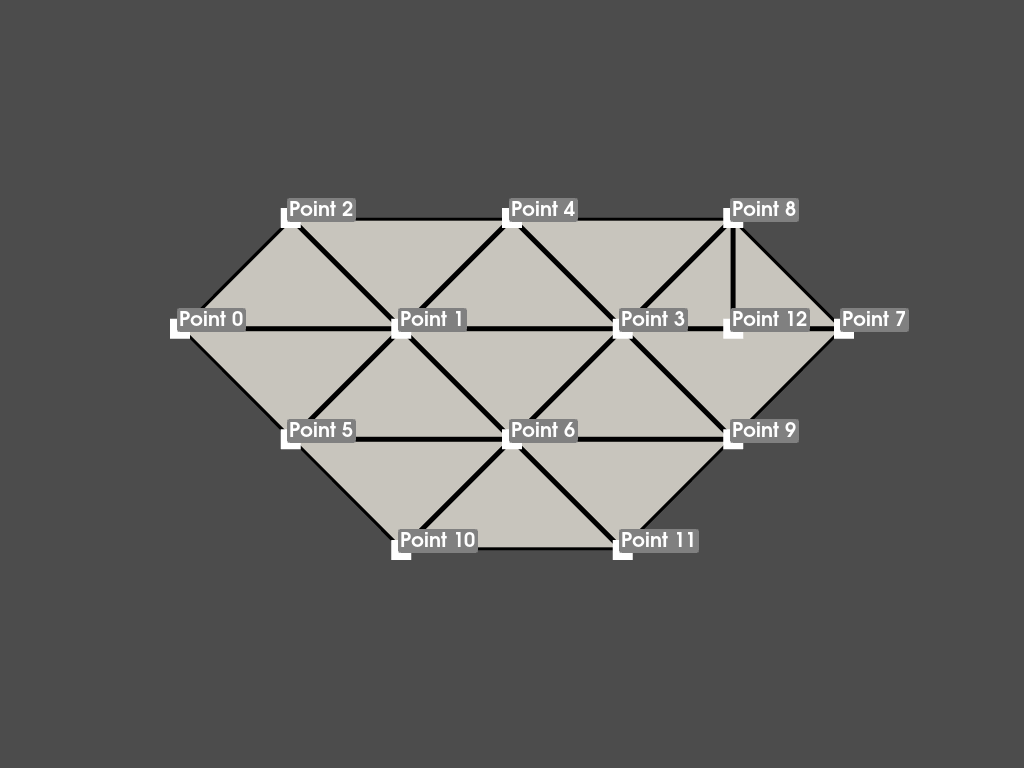

In [12]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 7
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]


point = ((points[e]+points[d])/2)
points = np.vstack([points,point])

cells[c]= [3, (g-1),e,f]
cells = np.vstack([cells, [3, d,(g-1),f]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(13)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

# Option 2
Now lets try to devide the cell in four.

Again the original cell will be...

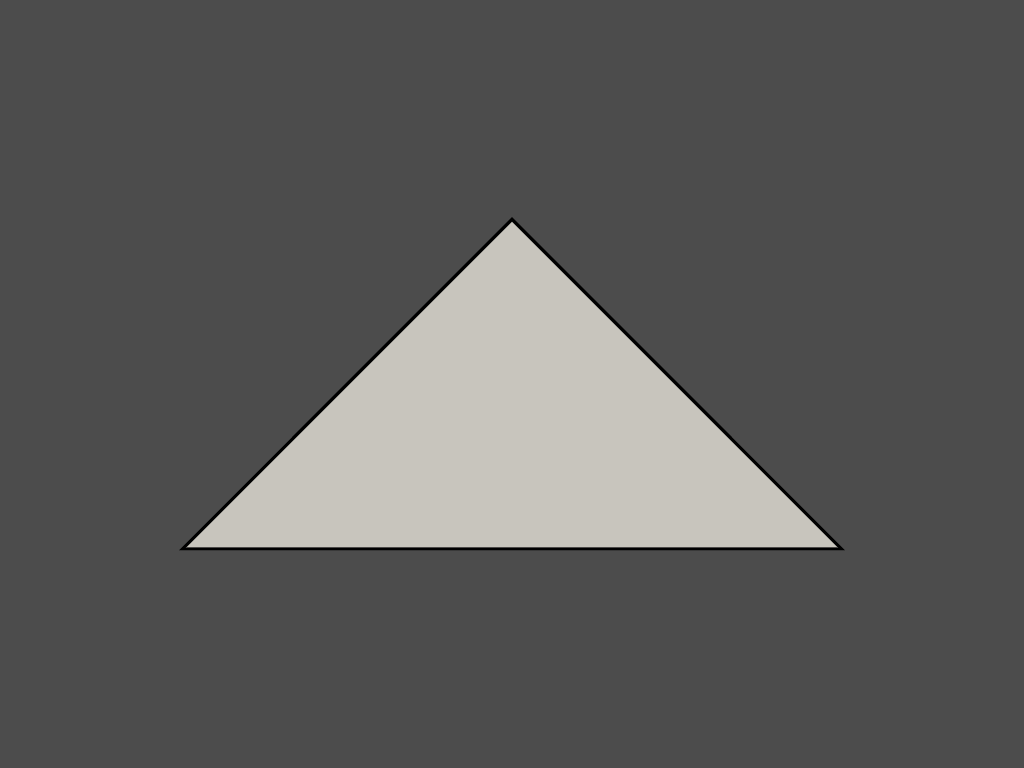

In [13]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])
cells = [[3, 0, 1, 2]]
mesh = pyvista.PolyData(points, [3, 0, 1, 2])
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(3)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

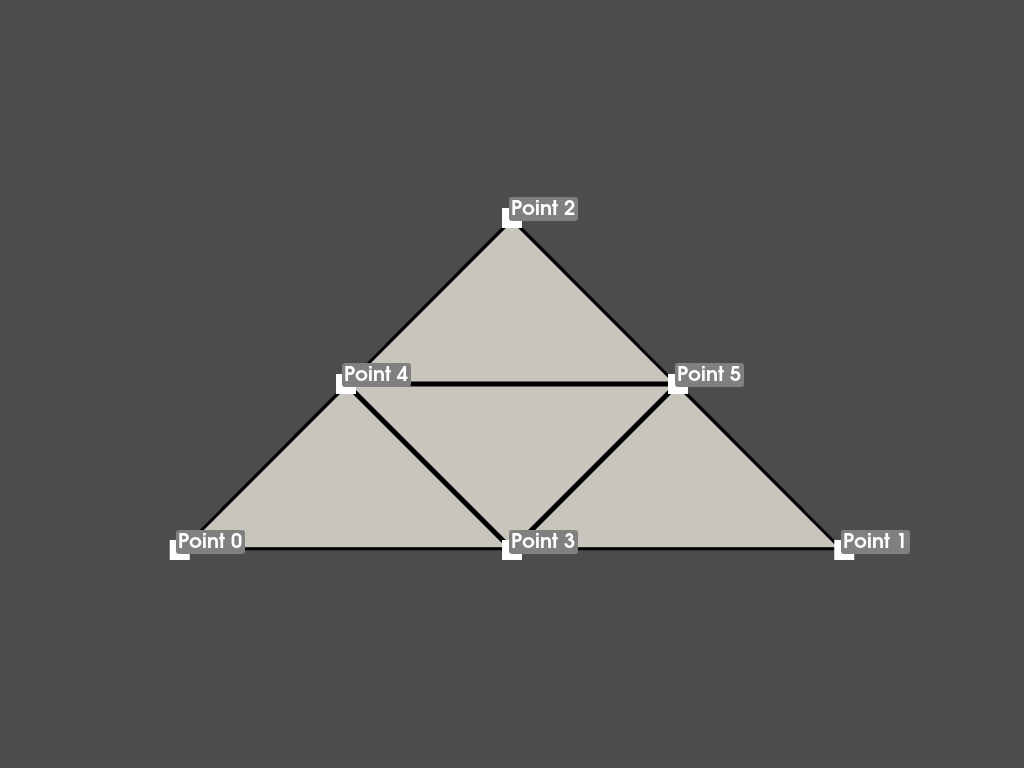

In [14]:
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0],
                   [1,0,0],
                   [0.5,0.5,0],
                   [1.5,0.5,0]])
# [number of points, first point, second point, third point]
cells = [[3, 0,3,4, 
          3, 3,1,5, 
          3, 3,5,4,
          3, 4,5,2]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(6)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

[[0.  0.  0. ]
 [2.  0.  0. ]
 [1.  1.  0. ]
 [1.  0.  0. ]
 [1.5 0.5 0. ]
 [0.5 0.5 0. ]]


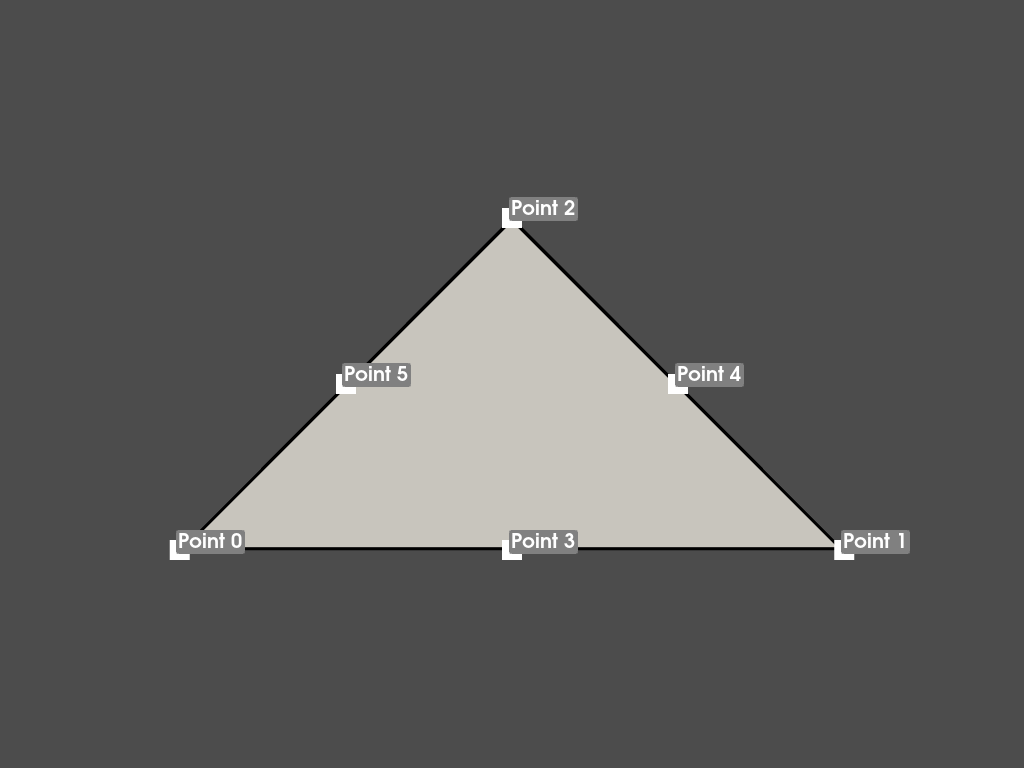

In [15]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])
cells = [[3, 0, 1, 2]]


point1 = ((points[1]+points[0])/2)
point2 = ((points[2]+points[1])/2)
point3 = ((points[0]+points[2])/2)
points = np.vstack([points,point1,point2,point3])
print(points)

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(6)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

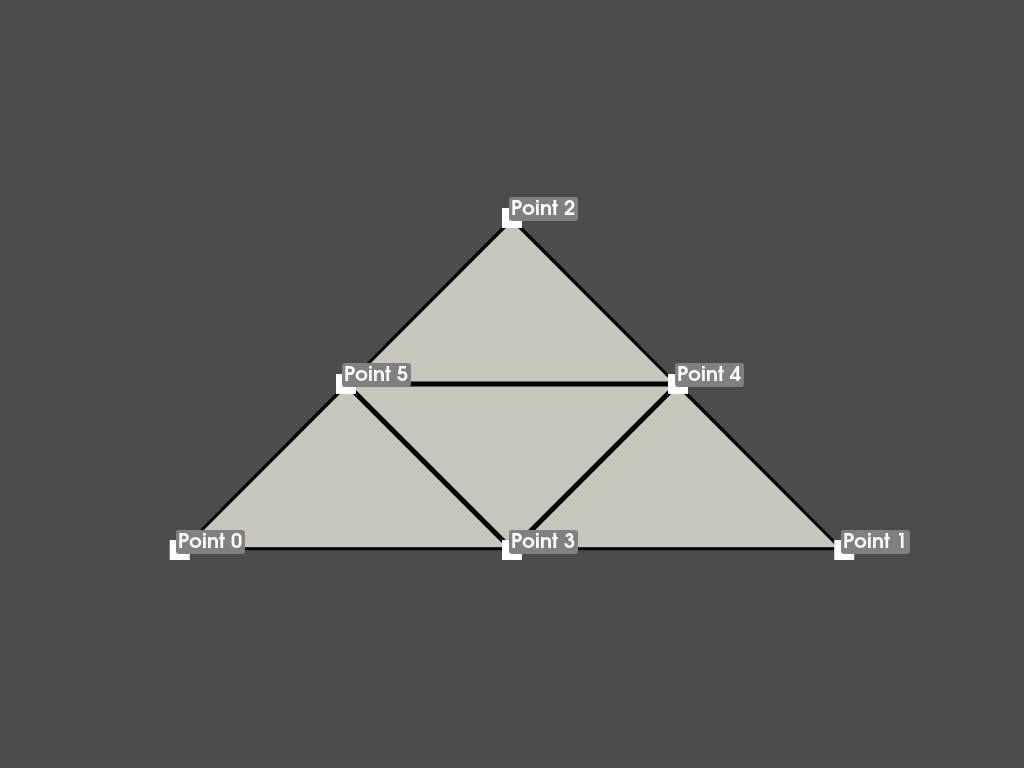

In [16]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                   [2,0,0],
                   [1,1,0]])
cells = [[3, 0, 1, 2]]

point1 = ((points[1]+points[0])/2)
point2 = ((points[2]+points[1])/2)
point3 = ((points[0]+points[2])/2)
points = np.vstack([points,point1,point2,point3])

c = 0
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
g = len(points)
cells[c]= [3, (g-1),(g-2),f]
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(6)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

Let again see if it also works for a small mesh.

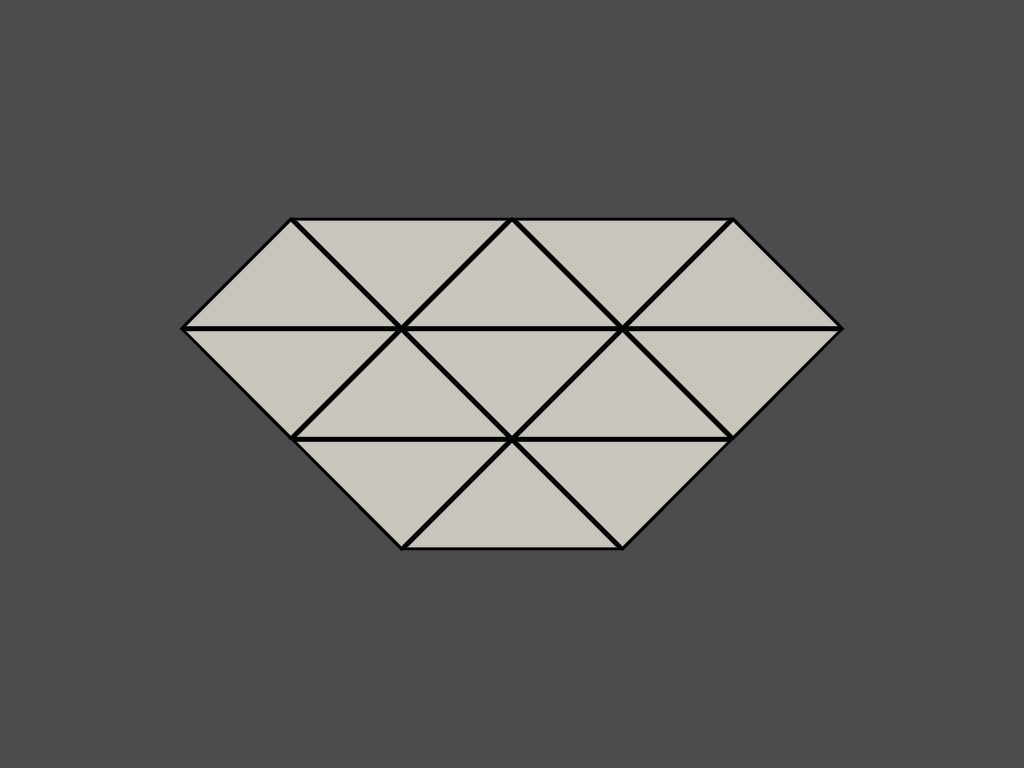

In [17]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(12)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

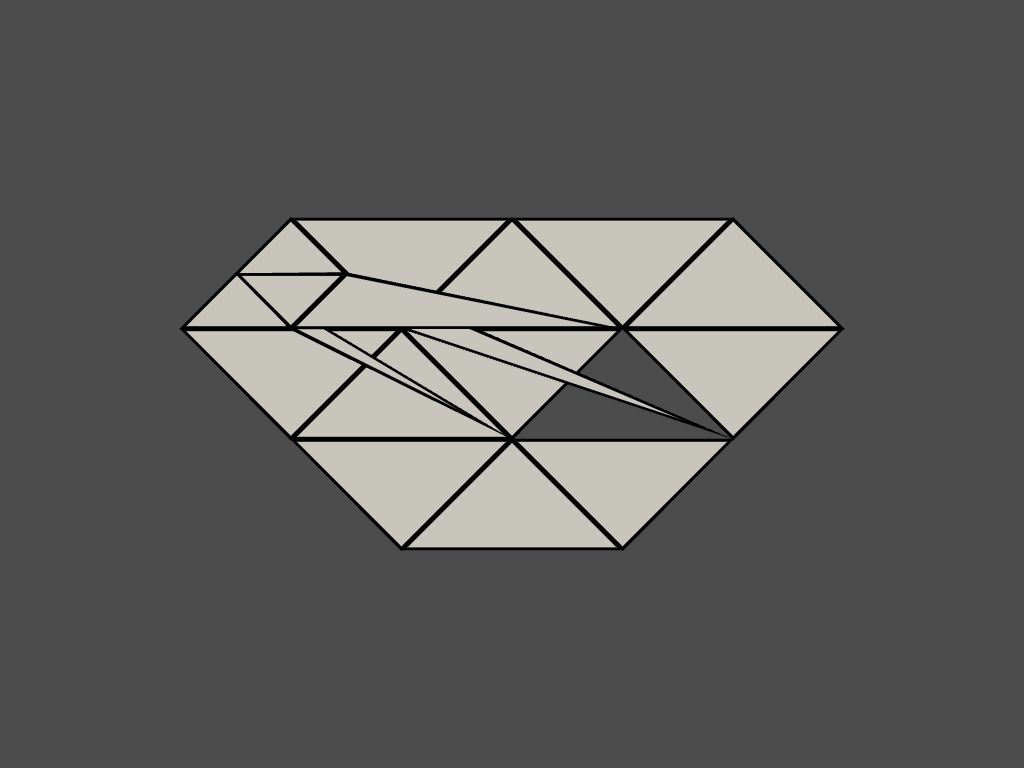

In [18]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

point1 = ((points[1]+points[0])/2)
point2 = ((points[2]+points[1])/2)
point3 = ((points[0]+points[2])/2)
points = np.vstack([points,point1,point2,point3])

c = 8
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
g = len(points)
cells[c]= [3, (g-1),(g-2),f]
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(6)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

Again that does not works so the code should be adjusted.

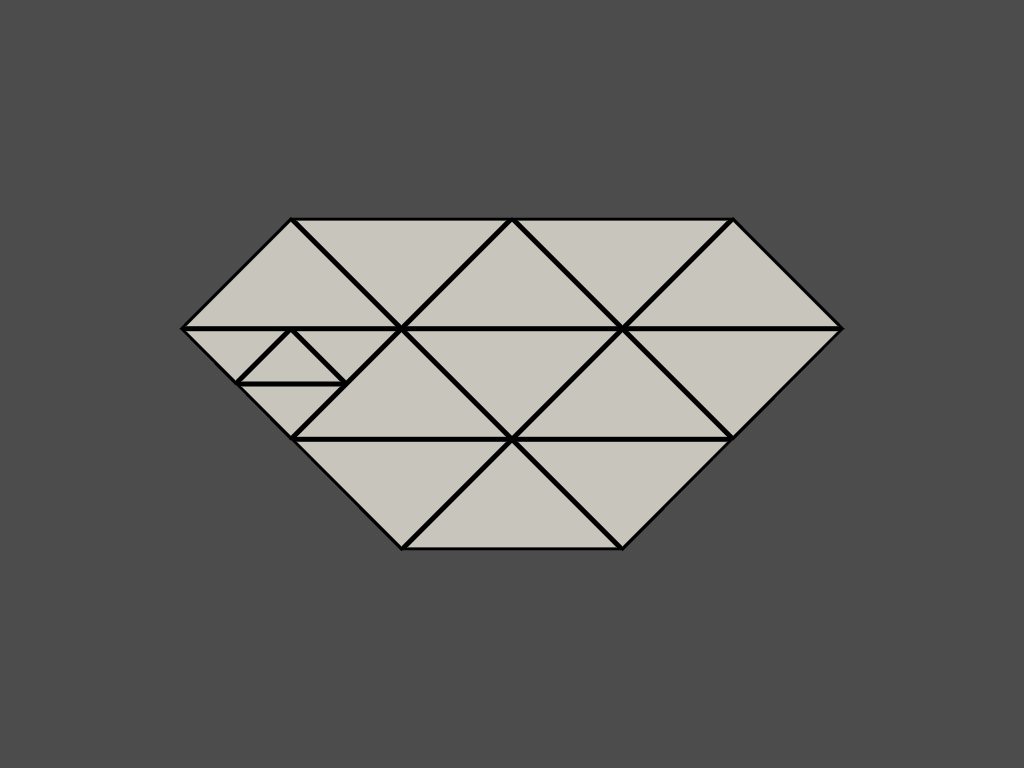

In [19]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 3
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]

point1 = ((points[e]+points[d])/2)
point2 = ((points[f]+points[e])/2)
point3 = ((points[d]+points[f])/2)
points = np.vstack([points,point1,point2,point3])


g = len(points)
cells[c]= [3, (g-1),(g-2),f]
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(6)],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

# Removing hanging nodes
In both previous meshes there are hanging notes, now lets try to remove them.

1 3 4
[[ 3  0  1  2]
 [ 3  1 13  4]
 [ 3  1  4  2]
 [ 3  0  5  1]
 [ 3  5  6 14]
 [ 3 14 13  1]
 [ 3  3  8  4]
 [ 3  3  7  8]
 [ 3  6 12  9]
 [ 3  9  7  3]
 [ 3  5 10  6]
 [ 3 10 11  6]
 [ 3 11  9  6]
 [ 3  6 14 12]
 [ 3 13  3 12]
 [ 3 14 13 12]
 [ 3  5 14  1]
 [ 3 12  3  9]
 [ 3 13  3  4]]


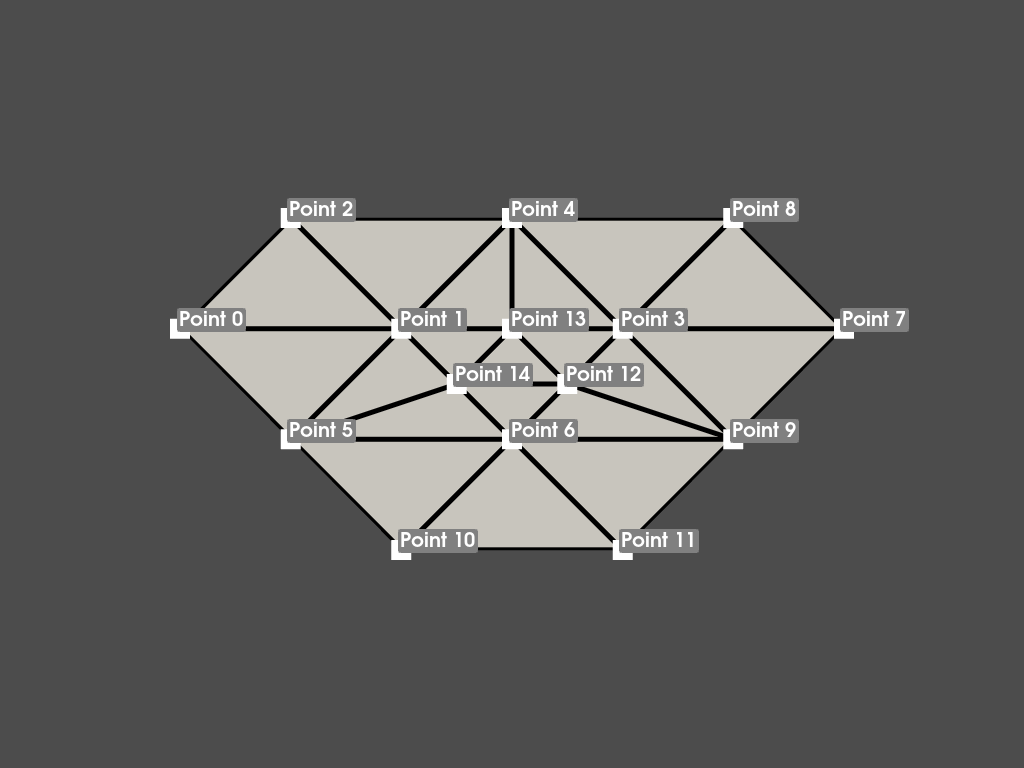

In [20]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 5
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]

d1 = cells[c-1][1]
e1 = cells[c-1][2]
f1 = cells[c-1][3]

d2 = cells[c+3][1]
e2 = cells[c+3][2]
f2 = cells[c+3][3]

d3 = cells[c-4][1]
e3 = cells[c-4][2]
f3 = cells[c-4][3]
print(d3,e3,f3)

point1 = ((points[e]+points[d])/2)
point2 = ((points[f]+points[e])/2)
point3 = ((points[d]+points[f])/2)
points = np.vstack([points,point1,point2,point3])

g = len(points)

cells[c]= [3, (g-1),(g-2),f]
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

cells[c-1]= [3, d1,e1,(g-1)]
cells = np.vstack([cells, [3, d1,(g-1),f1]])

cells[c+3]= [3, d2,(g-3),f2]
cells = np.vstack([cells, [3, (g-3),e2,f2]])

cells[c-4]= [3, d3,(g-2),f3]
cells = np.vstack([cells, [3, (g-2),e3,f3]])
print(cells)

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(15)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

11 9 6
[[ 3  0  1  2]
 [ 3  1  3  4]
 [ 3  1  4 14]
 [ 3 14 13  1]
 [ 3  5  6  1]
 [ 3  6  3  1]
 [ 3  3 12  4]
 [ 3  3  7  8]
 [ 3  6  3  9]
 [ 3  9  7  3]
 [ 3  5 10  6]
 [ 3 10 11  6]
 [ 3 11  9  6]
 [ 3  0 14 12]
 [ 3 13  5 12]
 [ 3 14 13 12]
 [ 3  1 14  2]
 [ 3 11 13  6]
 [ 3 13  9  6]]


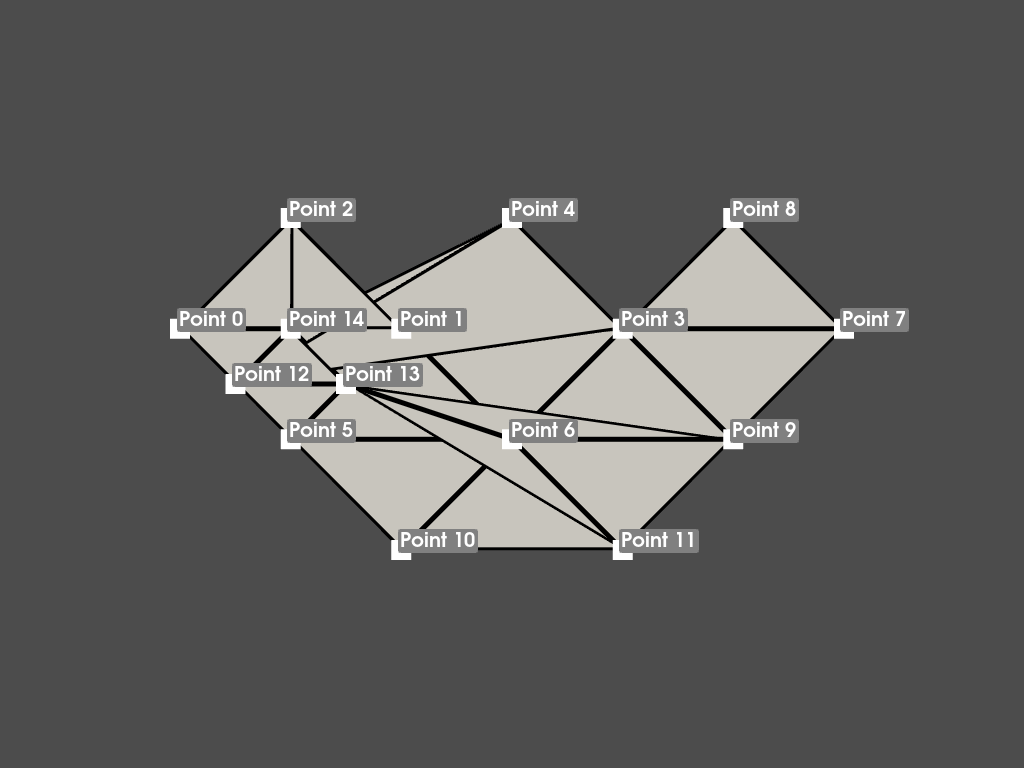

In [21]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 3
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]

d1 = cells[c-1][1]
e1 = cells[c-1][2]
f1 = cells[c-1][3]

d2 = cells[c+3][1]
e2 = cells[c+3][2]
f2 = cells[c+3][3]

d3 = cells[c-4][1]
e3 = cells[c-4][2]
f3 = cells[c-4][3]
print(d3,e3,f3)

point1 = ((points[e]+points[d])/2)
point2 = ((points[f]+points[e])/2)
point3 = ((points[d]+points[f])/2)
points = np.vstack([points,point1,point2,point3])

g = len(points)

cells[c]= [3, (g-1),(g-2),f]
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

cells[c-1]= [3, d1,e1,(g-1)]
cells = np.vstack([cells, [3, d1,(g-1),f1]])

cells[c+3]= [3, d2,(g-3),f2]
cells = np.vstack([cells, [3, (g-3),e2,f2]])

cells[c-4]= [3, d3,(g-2),f3]
cells = np.vstack([cells, [3, (g-2),e3,f3]])
print(cells)

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(15)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

This only works for cell number 5, so we need to find a different solution.

In [22]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]


g = len(points)
i = len(cells)
connected_points = []
cp1 = 0

for y in range(0,g):
        if y == 3:
            for x in range(0,i):
                cp = cells[x].count(y)
                cp1= cp1+cp                
            connected_points.append(cp1-i)
            cp1 = 0
            
        elif y != 3:
            for x in range(0,i):
                cp = cells[x].count(y)
                cp1= cp1+cp 
            connected_points.append(cp1)
            cp1 = 0

            
connected_points # to how many other points is a single point connected.

[2, 6, 2, 6, 3, 3, 6, 2, 2, 3, 2, 2]

With the code above the connection to the other points is calculated. A 2 means that the cell is a corner node, a 3 means that it is a side node, and a 6 means that it is an cell in the middle. Now lets try to find the connectivity of the cells.

In [23]:
connected_cells = []
for y in range(0, i):
    a1 = connected_points[cells[y][1]]
    a2 = connected_points[cells[y][2]]
    a3 = connected_points[cells[y][3]]
    b = [a1,a2,a3]
    c1 = b.count(2)
    c2 = b.count(3)
    c3 = b.count(6)
    if c1+c2 == 2:
        cc = 2
        connected_cells.append(cc)
    elif c3 >= 2:
        cc = 3
        connected_cells.append(cc)
        
connected_cells

[2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2]

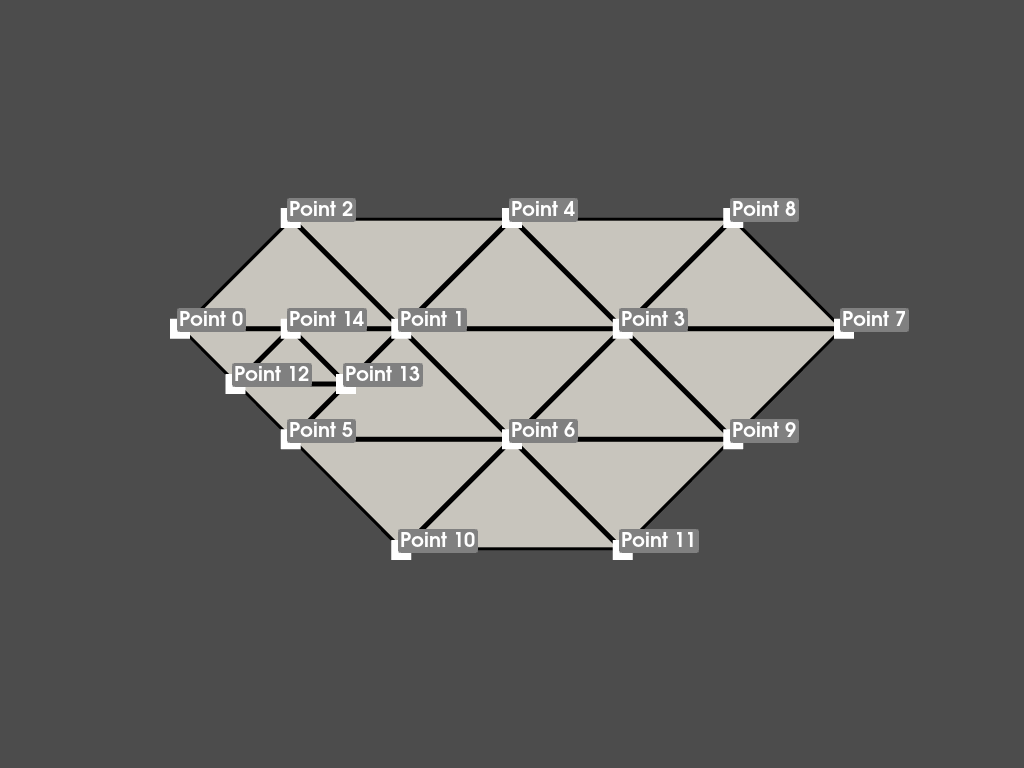

The connectivity of cell 3 is 2


In [24]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 3
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]

connected_cells = []
a1 = connected_points[cells[y][1]]
a2 = connected_points[cells[y][2]]
a3 = connected_points[cells[y][3]]
a = [a1,a2,a3]
b1 = a.count(2)
b2 = a.count(3)
b3 = a.count(6)
b = [b1,b2,b3]
if c1+c2 == 2:
    cc = 2
elif c3 >= 2:
    cc = 3
    
point1 = ((points[e]+points[d])/2)
point2 = ((points[f]+points[e])/2)
point3 = ((points[d]+points[f])/2)
points = np.vstack([points,point1,point2,point3])

g = len(points)

cells[c]= [3, (g-1),(g-2),f]
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(15)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()
print('The connectivity of cell', c, 'is', cc)

Now let try to find out the numbers of the neighbouring cells.

In [25]:
y = []
for x in range(0,i):
    if e in cells[x] and f in cells[x]:
          y.append(x)

for x in range(0,i):
    if d in cells[x] and e in cells[x]:
          y.append(x)

for x in range(0,i):
    if d in cells[x] and f in cells[x]:
          y.append(x)   
            
y

[4, 0]

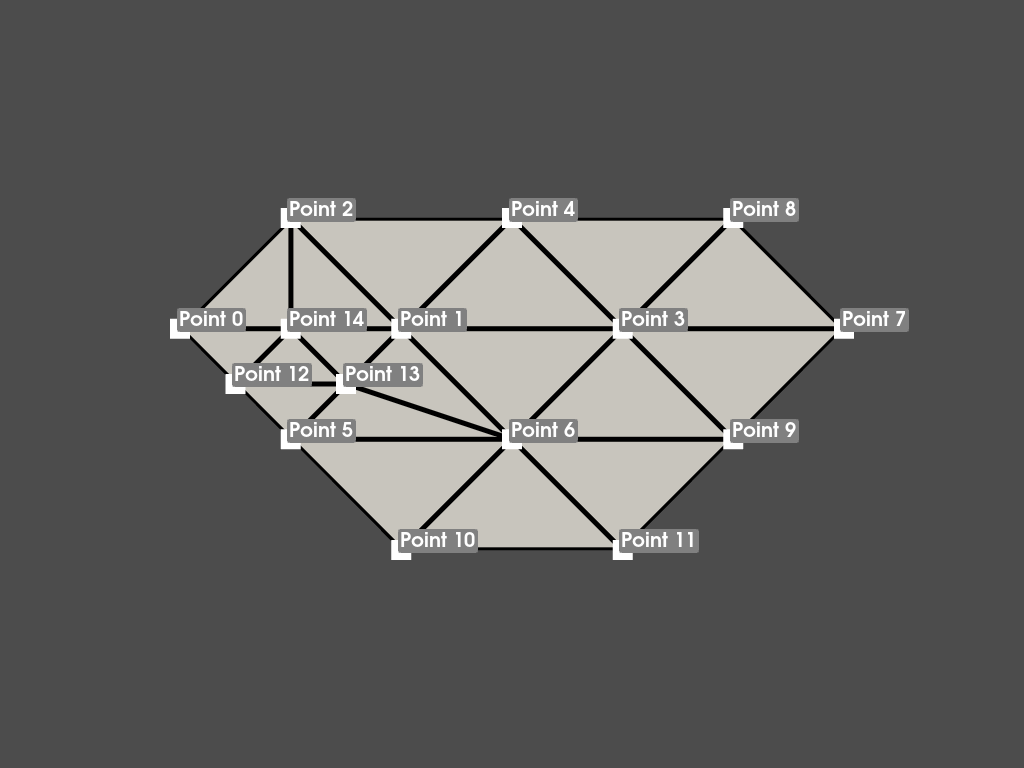

In [26]:
import numpy as np
import pyvista
points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 3
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
g = len(points)
i = len(cells)

#------Calculating the connectivity of the points---------------------------------------------------------------------#
connected_points = []
cp1 = 0

for y in range(0,g):
        if y == 3:
            for x in range(0,i):
                cp = cells[x].count(y)
                cp1= cp1+cp                
            connected_points.append(cp1-i)
            cp1 = 0
            
        elif y != 3:
            for x in range(0,i):
                cp = cells[x].count(y)
                cp1= cp1+cp 
            connected_points.append(cp1)
            cp1 = 0

connected_cells = []

#------Calculating the connectivity of the cells----------------------------------------------------------------------#
a1 = connected_points[cells[y][1]]
a2 = connected_points[cells[y][2]]
a3 = connected_points[cells[y][3]]
a = [a1,a2,a3]
b1 = a.count(2)
b2 = a.count(3)
b3 = a.count(6)
b = [b1,b2,b3]

if c1+c2 == 2:
    cc = 2
elif c3 >= 2:
    cc = 3

#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
point1 = ((points[e]+points[d])/2)
point2 = ((points[f]+points[e])/2)
point3 = ((points[d]+points[f])/2)
points = np.vstack([points,point1,point2,point3])

g = len(points)

cells[c]= [3, (g-1),(g-2),f]
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

#--------Finding the neighbouring cells-------------------------------------------------------------------------------#
y = []

for x in range(0,i):
    if e in cells[x] and f in cells[x]:
          y.append(x)

for x in range(0,i):
    if d in cells[x] and e in cells[x]:
          y.append(x)

for x in range(0,i):
    if d in cells[x] and f in cells[x]:
          y.append(x)   
#---------Splitting the neighbouring cells---------------------------------------------------------------------------#
d1 = cells[y[0]][1]
e1 = cells[y[0]][2]
f1 = cells[y[0]][3]
cells[y[0]]= [3, d1,e1,(g-2)]
cells = np.vstack([cells, [3, (g-2),e1,f1]])

d2 = cells[y[1]][1]
e2 = cells[y[1]][2]
f2 = cells[y[1]][3]
cells[y[1]]= [3, d2,(g-1),f2]
cells = np.vstack([cells, [3, (g-1),e2,f2]])

#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(15)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

Let again see if it also works for another cell.

11


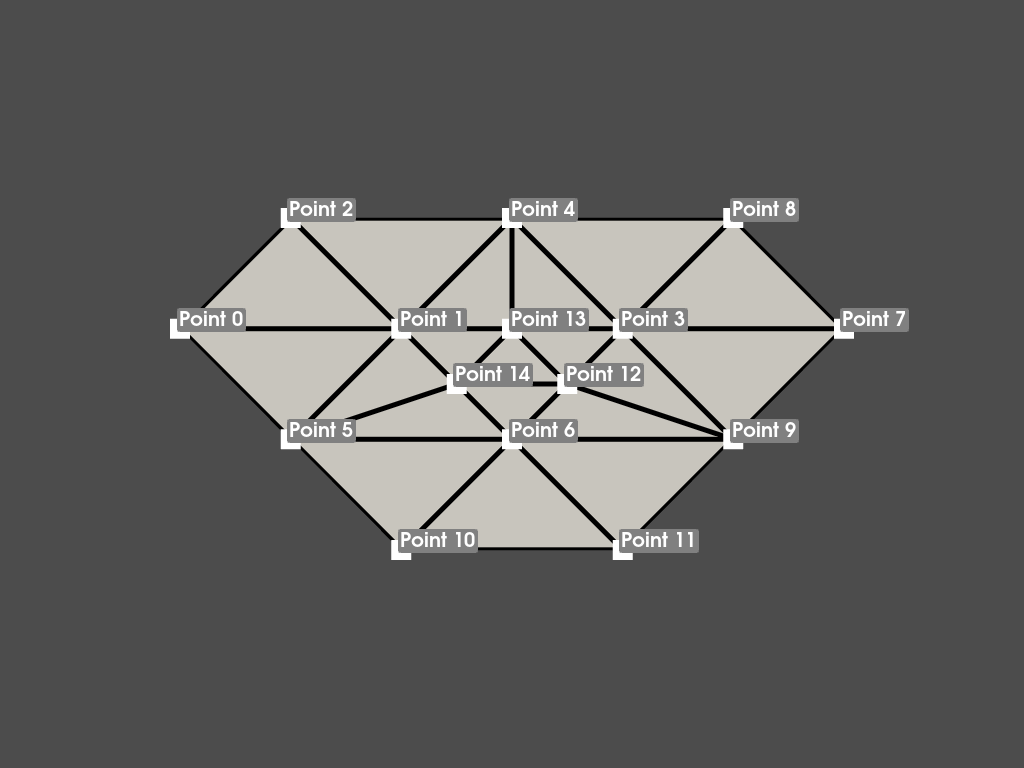

In [27]:
import numpy as np
import pyvista
import math

points = np.array([[0,0,0],
                  [2,0,0],
                  [1,1,0],
                  [4,0,0],
                  [3,1,0],
                  [1,-1,0],
                  [3,-1,0],
                  [6,0,0],
                  [5,1,0],
                  [5,-1,0],
                  [2,-2,0],
                  [4,-2,0]])
cells = [[3, 0,1,2], 
         [3, 1,3,4],
         [3, 1,4,2],
         [3, 0,5,1],
         [3, 5,6,1],
         [3, 6,3,1],
         [3, 3,8,4],
         [3, 3,7,8],
         [3, 6,3,9],
         [3, 9,7,3],
         [3, 5,10,6],
         [3, 10,11,6],
         [3, 11,9,6]]

c = 5 #number of the cell you wish to refine
d = cells[c][1]
e = cells[c][2]
f = cells[c][3]
cy=[d,e,f] #the numbers of the points creating the cell
g = len(points) #the total number of points in the mesh
i = len(cells) #the total number of cells in the mesh

#------Calculating the connectivity of the points---------------------------------------------------------------------#
connected_points = [] # the number of cells a single point is connected to
cp1 = 0

for y in range(0,g):
        if y == 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting               
            connected_points.append(cp1-i) #removing the additional countings of the triangluarity of the cells
            cp1 = 0
            
        elif y != 3:
            for x in range(0,i):
                cp = cells[x].count(y) #counting the number of times a point has been listed in the cells array
                cp1= cp1+cp #adding up the counting 
            connected_points.append(cp1)
            cp1 = 0

connected_cells = []
print(y)
#------Calculating the connectivity of the cells----------------------------------------------------------------------#
a1 = connected_points[cells[y][1]]
a2 = connected_points[cells[y][2]]
a3 = connected_points[cells[y][3]]
a = [a1,a2,a3] #an array containing the connectivity of the points of a specific cell
b1 = a.count(2)
b2 = a.count(3)
b3 = a.count(6)
b = [b1,b2,b3]

connected_cells = []
for y in range(0, i):
    a1 = connected_points[cells[y][1]]
    a2 = connected_points[cells[y][2]]
    a3 = connected_points[cells[y][3]]
    b = [a1,a2,a3]
    c1 = b.count(2)
    c2 = b.count(3)
    c3 = b.count(6)
    if c1+c2 == 2:
        cc = 2
        connected_cells.append(cc)
    elif c3 >= 2:
        cc = 3
        connected_cells.append(cc)

#-----Splitting the cell in four--------------------------------------------------------------------------------------#  
point1 = ((points[e]+points[d])/2)
point2 = ((points[f]+points[e])/2)
point3 = ((points[d]+points[f])/2)
points = np.vstack([points,point1,point2,point3])

g = len(points)

cells[c]= [3, (g-1),(g-2),f]
cells = np.vstack([cells, [3, d,(g-1),(g-3)]])
cells = np.vstack([cells, [3, (g-2),e,(g-3)]])
cells = np.vstack([cells, [3, (g-1),(g-2),(g-3)]])

#--------Finding the neighbouring cells-------------------------------------------------------------------------------#
y = [] #numbers neighbouring cell
v = 0

for x in range(0,i):
    if d in cells[x][1:] and e in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    y.append(i+1) 

v=0
for x in range(0,i):
    if e in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1
if v!= 1:
    v=0 
    y.append(i+1)     

v=0
for x in range(0,i):
    if d in cells[x][1:] and f in cells[x][1:]:
        y.append(x)
        v=1     
if v!= 1:
    v=0
    y.append(i+1)

#--------Determining which point the cells do not share---------------------------------------------------------------#
r =[] 
for x in range (0,3):
    q = cells[y[x]][1:] #points in the neighbouring cell
    for x in range (0,3):
        q1 = q[x]
        if q1 in cy: #if two cells share a point
            t = 1
            r.append(t)
        else: # if two cells do not share a point
            t = 0
            r.append(t)

#---------Splitting the neighbouring cells---------------------------------------------------------------------------#
j =0
p = []
m = []

for x in range(0,10):
    if j < 3: 
        a = r[x]
        p.append(a)
        j = j+1
    elif j == 3: 
        for z in range(0,3):
            z1=p[z]
            if z1==1:
                m.append(z)
        p = [] 
        if x < 9:
            a = r[x]
            p.append(a)
        j=1

 
n=3
j=0 

for z in range(0,3):
    u = y[z]
    if u <= i:
        d1 = cells[y[z]][1]
        e1 = cells[y[z]][2]
        f1 = cells[y[z]][3]
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n     
        cells[y[z]]= cell
        j=j+1
        cell = [3, d1, e1, f1]
        cell[m[j]+1] = g-n
        cells = np.vstack([cells, cell])  
        j=j+1
    n=n-1
    
#---------Plotting the new mesh--------------------------------------------------------------------------------------#
mesh = pyvista.PolyData(points, cells)
pl = pyvista.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=5)
label_coords = mesh.points + [0, 0, 0.01]
pl.add_point_labels(label_coords, [f'Point {i}' for i in range(15)],
                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

The code does well for cells 0,1,4,5,7 and 8. For the other it does not work.